<a href="https://colab.research.google.com/github/AAA123404/Financial-big-data-analysis/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

股市資料收集，爬蟲

(api　or　爬蟲)


In [18]:
!pip install yfinance

In [19]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2024-09-24 07:06:09--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.212.102, 173.194.212.139, 173.194.212.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-09-24 07:06:09--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-09-24 07

In [20]:
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib
import pandas as pd
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
pd.set_option('display.expand_frame_repr', False)

In [21]:
tsmc = yf.Ticker("2330.TW")
hist = tsmc.history(period="max")
print(hist.head())
print(type(hist))

                                Open       High        Low      Close        Volume  Dividends  Stock Splits
Date                                                                                                        
2000-01-04 00:00:00+08:00  34.216946  34.216946  33.640260  34.216946  200662336736        0.0           0.0
2000-01-05 00:00:00+08:00  34.216960  34.985813  33.832441  34.985813  402466805912        0.0           0.0
2000-01-06 00:00:00+08:00  34.793631  34.985799  34.216946  34.216946  197545715802        0.0           0.0
2000-01-07 00:00:00+08:00  33.063581  33.640267  32.679063  33.255749  235270344752        0.0           0.0
2000-01-10 00:00:00+08:00  34.216944  34.601278  33.640258  34.409111  276171685539        0.0           0.0
<class 'pandas.core.frame.DataFrame'>


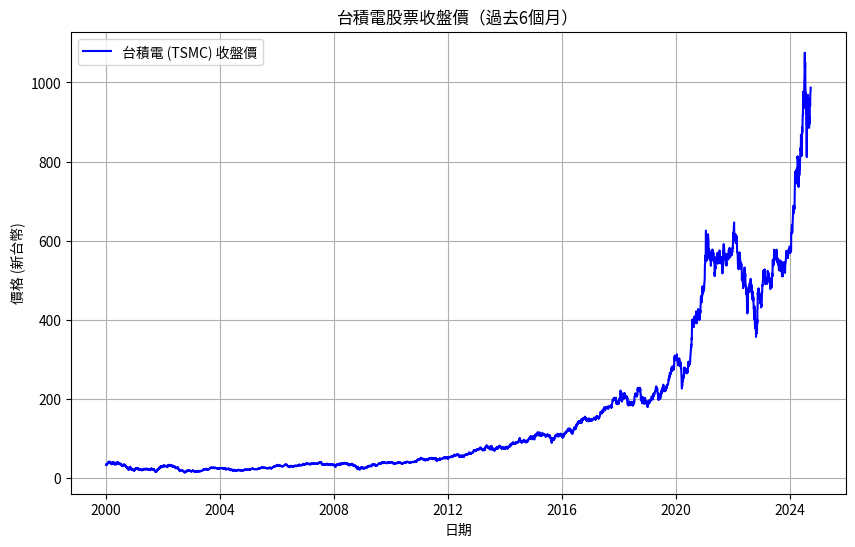

In [22]:
# 繪製台積電股票收盤價的趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(hist.index, hist['Close'], label="台積電 (TSMC) 收盤價", color='blue')
plt.title("台積電股票收盤價（過去6個月）")
plt.xlabel("日期")
plt.ylabel("價格 (新台幣)")
plt.grid(True)
plt.legend()
plt.show()

In [23]:
!pip install requests beautifulsoup4 pandas matplotlib


          日期        成交股數            成交金額     開盤價     最高價     最低價    收盤價    漲跌價差    成交筆數
0 2024-01-02  27,997,826  16,549,619,798  590.00  593.00  589.00  593.0    0.00  20,667
1 2024-01-03  40,134,497  23,267,025,945  584.00  585.00  576.00  578.0  -15.00  56,916
2 2024-01-04  18,063,758  10,466,284,102  580.00  581.00  577.00  580.0   +2.00  15,010
3 2024-01-05  22,008,878  12,685,460,114  578.00  580.00  574.00  576.0   -4.00  28,660
4 2024-01-08  19,270,119  11,232,942,053  582.00  585.00  579.00  583.0   +7.00  19,950


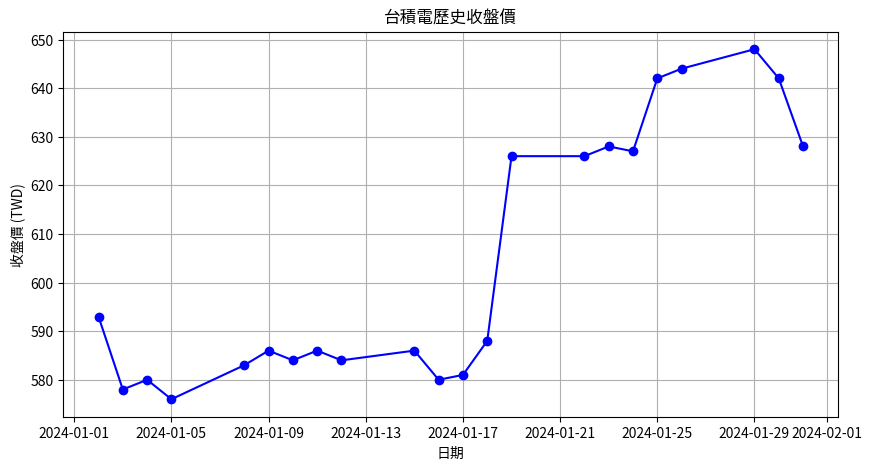

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 取得台積電(2330)的歷史股價資料
def get_stock_data(date):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo=2330"
    response = requests.get(url)
    data = response.json()
    return data

# 將民國年轉換為西元年
def convert_to_gregorian(date_str):
    parts = date_str.split('/')
    year = int(parts[0]) + 1911  # 民國年轉換為西元年
    return f'{year}/{parts[1]}/{parts[2]}'

# 格式化日期範圍，例如：20240101 (2024年1月1日)
date = '20240101'
data = get_stock_data(date)

# 將資料轉換為 DataFrame
fields = data['fields']
rows = data['data']
df = pd.DataFrame(rows, columns=fields)

# 先將民國日期轉為西元日期，再轉換為 datetime 格式
df['日期'] = df['日期'].apply(convert_to_gregorian)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

# 將收盤價轉換為浮點數
df['收盤價'] = pd.to_numeric(df['收盤價'].str.replace(',', ''), errors='coerce')

# 顯示爬取到的資料
print(df.head())

# 繪製台積電的收盤價變化圖
plt.figure(figsize=(10, 5))
plt.plot(df['日期'], df['收盤價'], marker='o', linestyle='-', color='b')
plt.title('台積電歷史收盤價')
plt.xlabel('日期')
plt.ylabel('收盤價 (TWD)')
plt.grid(True)
plt.show()


In [25]:
#https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240801&stockNo=2330&response=json&_=1727160658145
import pandas as pd
import numpy as np
import json
import requests

In [26]:
url = 'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240801&stockNo=2330&response=json&_=1727160658145'
data = requests.get(url).text

In [27]:
data

'{"stat":"OK","date":"20240801","title":"113年08月 2330 台積電           各日成交資訊","fields":["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"],"data":[["113/08/01","50,257,642","48,211,390,158","969.00","969.00","948.00","960.00","+26.00","66,845"],["113/08/02","89,044,852","81,488,499,047","918.00","928.00","903.00","903.00","-57.00","451,562"],["113/08/05","159,662,795","133,482,646,539","852.00","857.00","813.00","815.00","-88.00","588,373"],["113/08/06","108,521,787","94,271,532,567","868.00","895.00","840.00","880.00","+65.00","189,677"],["113/08/07","62,643,163","56,900,026,373","901.00","920.00","893.00","920.00","+40.00","109,333"],["113/08/08","41,288,222","37,045,507,217","901.00","905.00","887.00","896.00","-24.00","107,303"],["113/08/09","54,464,183","50,586,946,042","927.00","934.00","922.00","934.00","+38.00","94,661"],["113/08/12","40,968,742","38,572,439,136","942.00","948.00","931.00","940.00","+6.00","73,731"],["113/08/13","26,831,364","25,227,760,336","945.00","945.

In [28]:
json_data = json.loads(data)
Stock_data = json_data['data']
StockPrice = pd.DataFrame(Stock_data, columns = ['Date','Volume','Volume_Cash','Open','High','Low','Close','Change','Order'])

In [29]:
StockPrice['Date'] = StockPrice['Date'].str.replace('/','').astype(int) + 19110000
StockPrice['Date'] = pd.to_datetime(StockPrice['Date'].astype(str))
StockPrice['Volume'] = StockPrice['Volume'].str.replace(',','').astype(float)/1000
StockPrice['Volume_Cash'] = StockPrice['Volume_Cash'].str.replace(',','').astype(float)
StockPrice['Order'] = StockPrice['Order'].str.replace(',','').astype(float)

StockPrice['Open'] = StockPrice['Open'].str.replace(',','').astype(float)
StockPrice['High'] = StockPrice['High'].str.replace(',','').astype(float)
StockPrice['Low'] = StockPrice['Low'].str.replace(',','').astype(float)
StockPrice['Close'] = StockPrice['Close'].str.replace(',','').astype(float)

StockPrice = StockPrice.set_index('Date', drop = True)
StockPrice = StockPrice[['Open','High','Low','Close','Volume']]

In [30]:
StockPrice

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01,969.0,969.0,948.0,960.0,50257.642
2024-08-02,918.0,928.0,903.0,903.0,89044.852
2024-08-05,852.0,857.0,813.0,815.0,159662.795
2024-08-06,868.0,895.0,840.0,880.0,108521.787
2024-08-07,901.0,920.0,893.0,920.0,62643.163
2024-08-08,901.0,905.0,887.0,896.0,41288.222
2024-08-09,927.0,934.0,922.0,934.0,54464.183
2024-08-12,942.0,948.0,931.0,940.0,40968.742
2024-08-13,945.0,945.0,937.0,941.0,26831.364
